In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
data = pd.read_csv('data/dataset.csv', index_col=0)
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [5]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Check Feature Correlations

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data.drop_duplicates(subset=['track_name', 'artists'], keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)  # fix indices after removing duplicates

numerical_data = data[['track_genre', 'energy', 'danceability', 'loudness', 'popularity', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity', 'duration_ms', 'key', 'mode', 'time_signature']]
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
numerical_data[numeric_features] = scaler.fit_transform(numerical_data[numeric_features])
numerical_data['tempo'] = ( numerical_data['tempo'] - numerical_data['tempo'].min() ) / (numerical_data['tempo'].max() - numerical_data['tempo'].min())
# numerical_data['loudness'] = ( numerical_data['loudness'] - numerical_data['loudness'].mean() ) / numerical_data['loudness'].std()

features = ['track_genre', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
feature_data = numerical_data[features]
# feature_data['tempo'] = ( feature_data['tempo'] - feature_data['tempo'].min() ) / (feature_data['tempo'].max() - feature_data['tempo'].min())
# feature_data['loudness'] = ( feature_data['loudness'] - feature_data['loudness'].min() ) / (feature_data['loudness'].max() - feature_data['loudness'].min())
# feature_data['loudness'] = ( feature_data['loudness'] - feature_data['loudness'].mean() ) / feature_data['loudness'].std()

/tmp/ipykernel_4556/3425715054.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data[numeric_features] = scaler.fit_transform(numerical_data[numeric_features])
/tmp/ipykernel_4556/3425715054.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['tempo'] = ( numerical_data['tempo'] - numerical_data['tempo'].min() ) / (numerical_data['tempo'].max() - numerical_data['tempo'].min())


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, 'energy'),
  Text(1.5, 0, 'danceability'),
  Text(2.5, 0, 'loudness'),
  Text(3.5, 0, 'popularity'),
  Text(4.5, 0, 'speechiness'),
  Text(5.5, 0, 'acousticness'),
  Text(6.5, 0, 'instrumentalness'),
  Text(7.5, 0, 'liveness'),
  Text(8.5, 0, 'valence'),
  Text(9.5, 0, 'tempo'),
  Text(10.5, 0, 'popularity'),
  Text(11.5, 0, 'duration_ms'),
  Text(12.5, 0, 'key'),
  Text(13.5, 0, 'mode'),
  Text(14.5, 0, 'time_signature')])

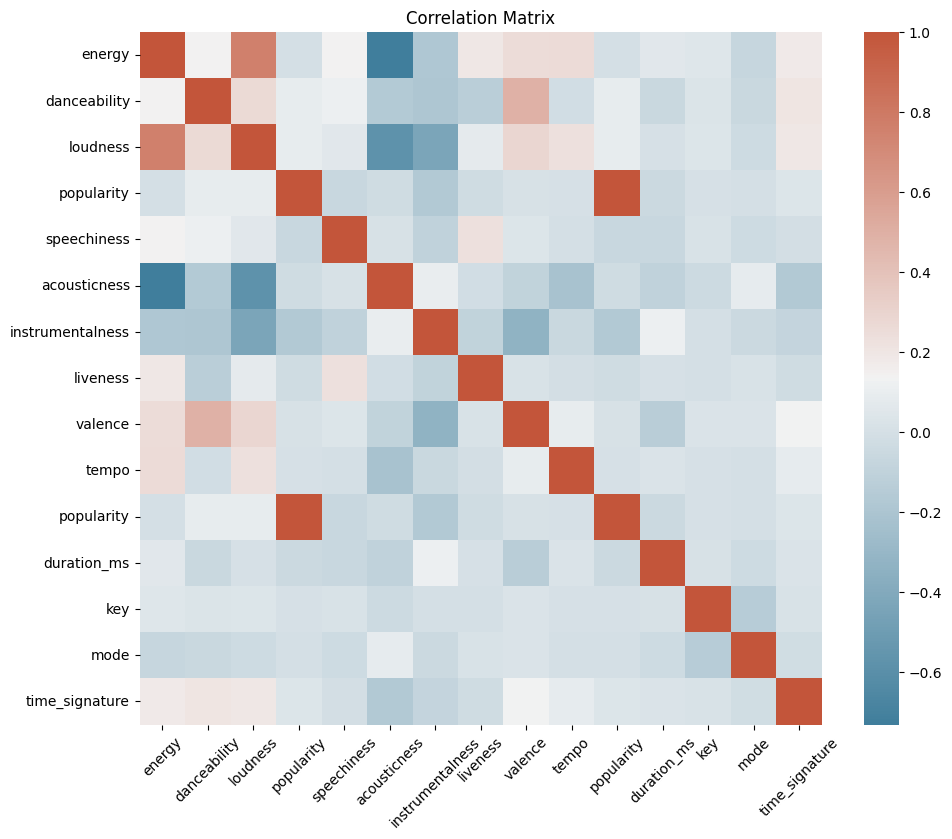

In [7]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(numerical_data.loc[:, numerical_data.columns != 'track_genre'].corr(), cmap=cmap).set(title='Correlation Matrix')
plt.xticks(rotation=45)

# Visulize Feature Distributions

## Features of a song based on their genre

In [8]:
data.groupby('track_genre').nunique()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,,,,,,,
acoustic,941,330,690,911,62,919,2,409,565,12,907,2,377,615,492,388,566,933,4
afrobeat,953,343,491,947,55,936,2,413,488,12,900,2,552,723,677,527,520,936,4
alt-rock,798,342,472,792,55,782,2,404,439,12,750,2,439,678,521,476,552,791,5
alternative,238,110,157,235,50,234,2,197,198,12,229,2,204,223,140,176,209,232,4
ambient,937,325,521,918,72,924,2,496,652,12,923,2,325,421,425,360,562,929,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
techno,401,264,352,399,54,400,2,246,276,12,396,2,270,363,294,260,327,346,4
trance,676,447,505,675,57,645,2,346,320,12,645,2,456,580,473,417,442,563,4
trip-hop,861,297,491,859,53,846,2,415,496,12,827,2,491,696,650,474,568,844,4


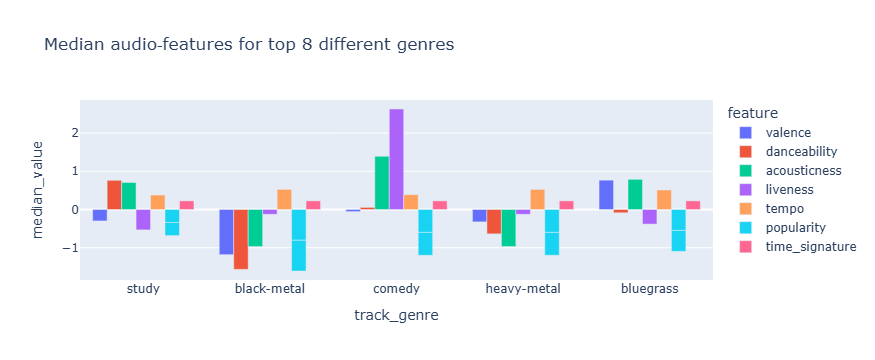

In [9]:
# 1. Compute medians per genre
med_songs = numerical_data.groupby('track_genre')[
    ['valence','danceability','acousticness','liveness', 'tempo', 'popularity', 'time_signature']
].median()

# 2. Find the N genres with the most tracks
top_genres = (
    numerical_data['track_genre']
    .value_counts()
    .nlargest(5)
    .index
    .tolist()
)

# 3. Select only those genres’ medians
selected = med_songs.loc[top_genres]

# 4. Melt to “long” form for px.bar
df_long = (
    selected
    .reset_index()
    .melt(id_vars='track_genre',
          var_name='feature',
          value_name='median_value')
)

# 5. Plot
fig = px.bar(
    df_long,
    x='track_genre',
    y='median_value',
    color='feature',
    barmode='group',
    title='Median audio‑features for top 8 different genres'
)
fig.show()

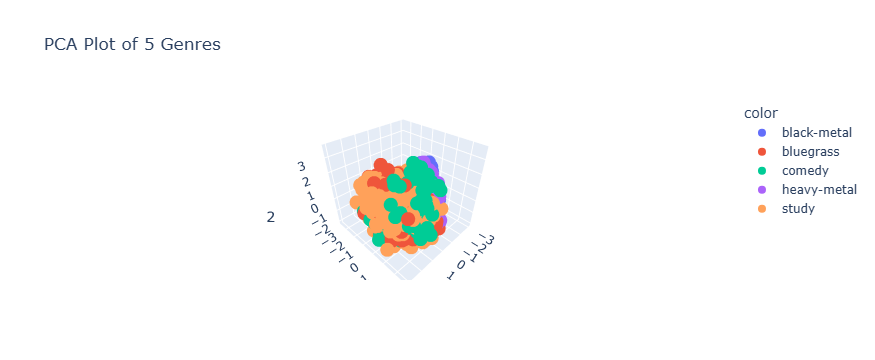

In [15]:
from sklearn.decomposition import PCA

top_genre_songs = numerical_data[numerical_data.track_genre.isin(top_genres)]

pca = PCA(n_components=3)
components = pca.fit_transform(top_genre_songs[['danceability', 'popularity', 'loudness', 'valence', 'tempo', 'acousticness']])

fig = px.scatter_3d(components, x=0, y=1, z=2, color=top_genre_songs['track_genre'], title='PCA Plot of 5 Genres')
fig.show()

# 2. Filter the raw data to only those genres
df = feature_data[feature_data['track_genre'].isin(top_genres)]

# 3. Melt into long form so each row is one (genre, feature, value)
df_long = (
    df
    .reset_index(drop=True)
    .melt(
        id_vars='track_genre',
        value_vars=features,
        var_name='feature',
        value_name='value'
    )
)

# 4a. Violin plot (shows density + box inside + points)
fig = px.violin(
    df_long,
    x='track_genre',
    y='value',
    color='track_genre',
    facet_col='feature',
    facet_col_wrap=4,
    box=True,           # draw a mini boxplot inside each violin
    points='all',       # show all points
    title='Distribution of Audio Features for Top 5 Genres',
    width=1500,    # ← total figure width in pixels
    height=700     # ← total figure height in pixels
)
fig.update_layout(showlegend=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_xaxes(tickangle=-45)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

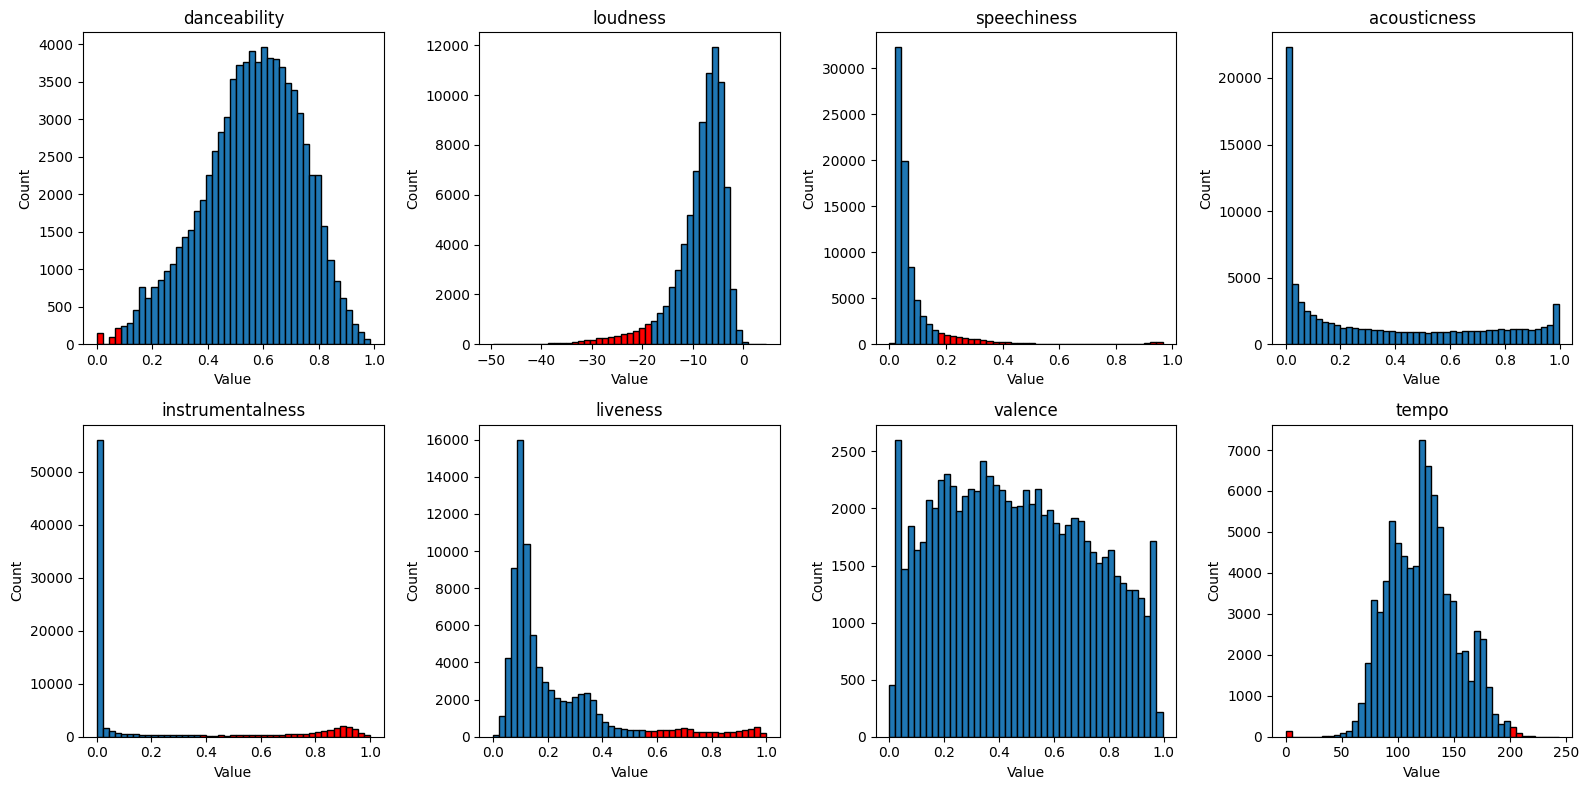

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 2) Create a 2×3 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# 3) For each feature: compute histogram & outlier bounds, then plot
for ax, feat in zip(axes, features[1:]):
    data = feature_data[feat].dropna().values
    
    # Box‑plot outlier thresholds
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    
    # Build histogram
    counts, edges = np.histogram(data, bins=45)
    centers = (edges[:-1] + edges[1:]) / 2
    width = edges[1] - edges[0]
    
    # Color bins outside [lower, upper] in red
    mask_in = (centers >= lower) & (centers <= upper)
    ax.bar(centers[mask_in],   counts[mask_in],   width=width, edgecolor='black')
    ax.bar(centers[~mask_in],   counts[~mask_in],  width=width, color='red', edgecolor='black')
    
    # 🏷 Labels & title
    ax.set_title(feat)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()
